# High Rated Games on Google Playstore

### Exploratory Data Analysis

This data from kaggle is web scraped and of 10k Play Store apps for analysing the Android market

The data can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).

### Importing header files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

sns.set_context("notebook", font_scale=1.3)

### Loading the data 

In [2]:
path = "app_data.csv"

#Loading the data
data = pd.read_csv(path)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Handling Missing Values

In [6]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent_null = total_null / len(data)
missing_data = pd.concat([total_null, percent_null], keys = ['Total', 'Percent'], axis = 1)
missing_data = missing_data[missing_data['Total'] > 0]
missing_data

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092


### Histogram for Rating

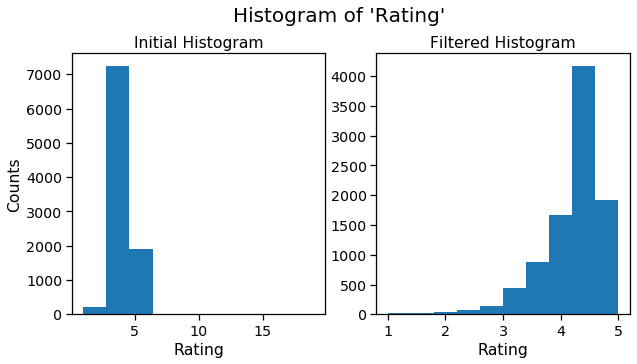

In [7]:
#Setting plot figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10,5))

#Plotting histogram 
axs[0].hist(data['Rating'])

#Filtering data with ('Rating'<=5) only
data_ = data[data['Rating'] <= 5]
axs[1].hist(data_['Rating'])

#Setting fig properties
fig.suptitle("Histogram of 'Rating' ", fontsize=20)
axs[0].set_xlabel('Rating')
axs[0].set_title('Initial Histogram')
axs[0].set_ylabel('Counts')

axs[1].set_xlabel('Rating')
axs[1].set_title('Filtered Histogram')
#axs[1].set_ylabel('Rating')
plt.subplots_adjust(top=0.85)
plt.show()

===========================================
### Missing data information after dropping null values

In [8]:
#Dropping null values
data.dropna(axis = 0, inplace = True)

total_null_1 = data.isnull().sum()
percent_null_1 = total_null_1 / data.isnull().count()
missing_data_1 = pd.concat([total_null_1, percent_null_1], keys = ['Total', 'Percent'], axis = 1)
missing_data_1

,Total,Percent
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


### Category vs Rating Analysis

(0, 6)

<Figure size 360x504 with 0 Axes>

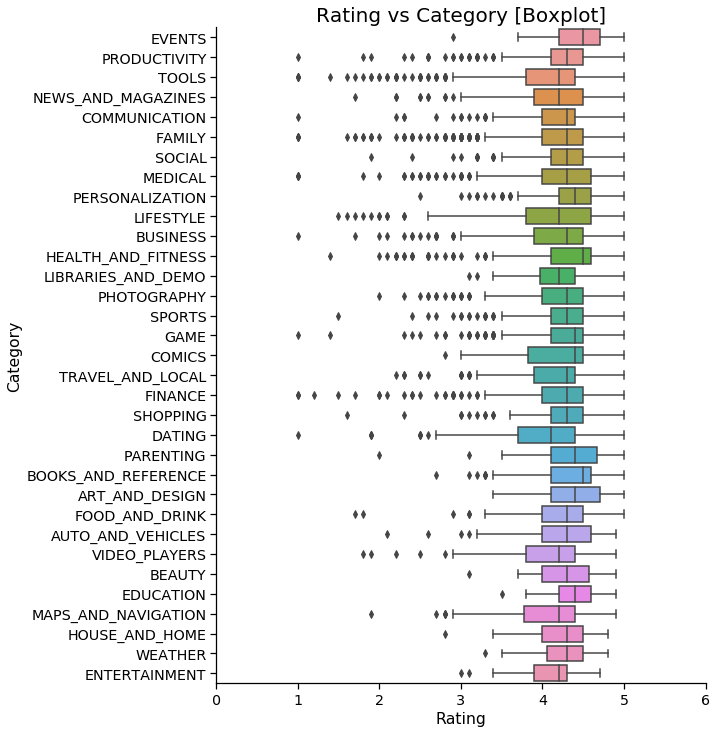

In [9]:
#Correlation test between Category-Ratings

plt.figure(figsize = (5,7))
ax = sns.catplot(x='Rating', y='Category', data=data.sort_values(by='Rating', ascending=False), kind='box', height=10)
#plt.xticks(rotation = 80)
plt.title('Rating vs Category [Boxplot]', fontsize=20)
plt.xlim(0,6)

#### Observation : 
Rating of application in each category don't vary with each other much.







### Installs vs Ratings Analysis

In [10]:
#Displaying value counts to observe distribution
#print(data.Installs.value_counts())

In [11]:
#Cleaning column data to convert it to int
data['Installs'] = data.apply(lambda x: x['Installs'].replace('+', ''), axis = 1)
data['Installs'] = data.apply(lambda x: int(x['Installs'].replace(',', '')), axis = 1)
data.loc[:5, 'Installs']

0       10000
1      500000
2     5000000
3    50000000
4      100000
5       50000
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating vs Installs [RegPlot]')

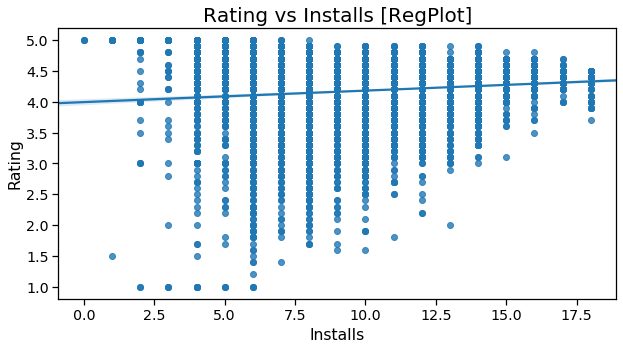

In [12]:
#Label Enconding for column 'Installs'

#Initialize the encoder
le = LabelEncoder()

#Transform the column data
data['Installs'] = le.fit_transform(data['Installs'])

#Plotting RegPlot
plt.figure(figsize=(10,5))
a = sns.regplot(x = 'Installs', y = 'Rating', data = data)
plt.title('Rating vs Installs [RegPlot]', fontsize=20)

#### Observation : 
There is but a small positive correlation between number of installs and ratings.


### Price vs Ratings Analysis

In [13]:
#Display value counts to observe distribution
data['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$19.99        5
$12.99        5
$11.99        5
$24.99        5
$8.99         4
$5.49         3
$10.00        3
$16.99        3
$1.00         2
$1.70         2
$7.49         2
$10.99        2
$79.99        2
           ... 
$2.59         1
$4.84         1
$2.90         1
$1.20         1
$3.08         1
$1.29         1
$3.88         1
$19.40        1
$400.00       1
$4.29         1
$389.99       1
$8.49         1
$14.00        1
$3.04         1
$4.77         1
$1.76         1
$15.46        1
$379.99       1
$37.99        1
$1.75         1
$299.99       1
$13.99        1
$1.59         1
$1.97         1
$2.00         1
$4.60         1
$1.61         1
$3.90         1
$4.59         1
$2.56         1
Name: Price, Length: 73,

Text(0.5, 1.0, 'Rating vs Price [RegPlot]')

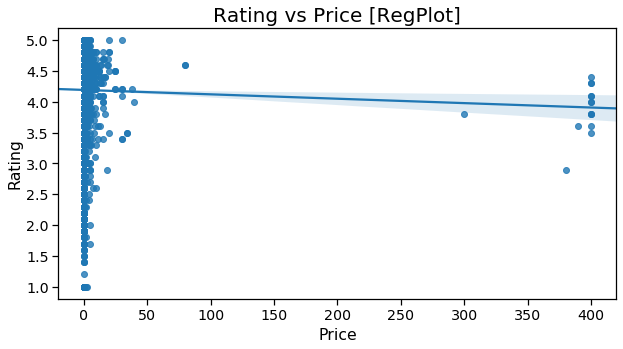

In [14]:
#Cleaning the column data of -> 'Price'
data = data[data['Price'].str.isalpha() == False]
data['Price'] = data.apply(lambda x: float(x['Price'].replace('$', '')), axis = 1)

#Plot RegPlot
plt.figure(figsize = (10,5))
sns.regplot(x = 'Price', y = 'Rating', data = data)
plt.title('Rating vs Price [RegPlot]', fontsize=20)

#### Observation : 
There is a negative correlation between price and ratings. Higher price application may make customer disappointed, if they are not good enough.

### Genre vs Rating Analysis

In [15]:
#Cleaning Data for column -> 'Genre'
splitted = data['Genres'].str.split(';')
data['Genres'] = splitted.str[0]
data['Genres'][:5]

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Genres, dtype: object

#### Grouping Genre and Rating by Genre

In [16]:
gr_mean = data.groupby(['Genres'], as_index = False)[['Rating']].mean().sort_values(by = 'Rating', ascending = False)

#Stastical overview of gr_mean
gr_mean.describe()

,Rating
count,48.000000
mean,4.212486
std,0.104071
min,3.970769
25%,4.132114
50%,4.204821
75%,4.286532
max,4.435556


#### Total number of unique Genre counts

In [17]:
len(data['Genres'].unique())

48

#### Displaying Top 5 Genres by Rating

(4.3, 4.6)

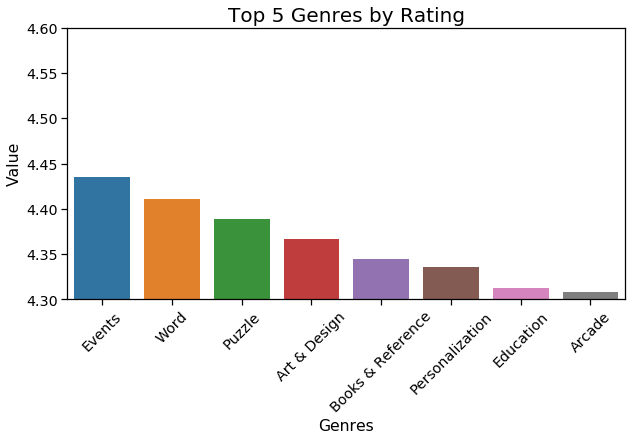

In [18]:
tidy_df = gr_mean.melt(id_vars='Genres').rename(columns=str.title)
tidy_df = tidy_df.iloc[:8,:]
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45)
plt.title('Top 5 Genres by Rating', fontsize=20)
ax = sns.barplot(x='Genres', y='Value', data=tidy_df)
ax.set_ylim(4.3,4.6)

#### Observations:
The lowest avg. rating on genres (Dating) is 3.97

The highest avg rating on genres (Events) is 4.43

With SD(Standard Deviation) of 0.1, it seems like genre doesn't have much effect on rating.

### Last_Updated_Date vs Rating Analysis

In [19]:
data['Last Updated'][:10]

0       January 7, 2018
1      January 15, 2018
2        August 1, 2018
3          June 8, 2018
4         June 20, 2018
5        March 26, 2017
6        April 26, 2018
7         June 14, 2018
8    September 20, 2017
9          July 3, 2018
Name: Last Updated, dtype: object

Text(0.5, 1.0, 'Rating vs Last Updated [RegPlot]')

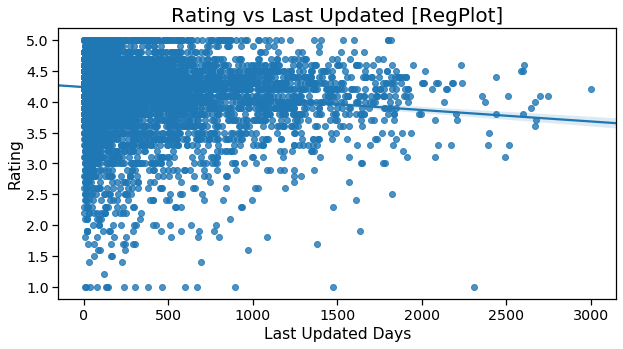

In [20]:
#Converting 'Last Updated' to datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

#Creating new column having `Last Updated` in days
max_date = data['Last Updated'].max()
data['Last Updated Days'] = (max_date - data['Last Updated']).dt.days

#Plotting a regression plot between `Rating` and `Last Updated Days`
plt.figure(figsize = (10,5))
sns.regplot(x = 'Last Updated Days', y = 'Rating', data = data)
plt.title('Rating vs Last Updated [RegPlot]', fontsize=20)

#### Observation:

Higher the gap between the days last updated, lower the rating